## Background

 The Data Envelopment Analysis (DEA) is a nonparametric problem in operations research and economics whose solution is an estimation of production frontiers. It is used to empirically measure the productive efficiency of decision making units (DMUs). There are a number of linear programming formulations of the DEA problem. Fuller coverage of the subject can be found in Farrell (1957), Charnes et al. (1978) and Thanassoulis et al. (1987). The formulation given by H.P. Williams is described in Land (1991). This formulation is the dual model of a model  commonly used that relies on finding weighted ratios of outputs to inputs. We will use the formulation that is commonly used and can be found in Cooper et al. (2007).

The Data Envelopment Analysis has been used to evaluate the performance of many different kinds of entities engaged in many different activities, and in many different contexts in many different countries. Examples include the maintenance activities of U.S. Air Force bases in different geographic locations, or police forces in England and Wales as well as the performance of branch banks in Cyprus and Canada and the efficiency of universities in performing their education and research functions in the U.S., England and France. 

The DEA approach is concerned with evaluations of *efficiency*. The most common measure of efficiency takes the form of a ratio like the following one:

$$
\text{efficiency} = \frac{\text{output}}{\text{input}}
$$



## Model Formulation

Assume there is a set of DMUs. Some common input and output items for each of these DMUs are selected as follows:
1. Numerical data are available for each input and output, with the data assumed to be positive, for all DMUs.
2. The items (inputs, outputs and choice of DMUs) should reflect an analyst's or a manager's interest in the components that will enter into the relative efficiency evaluations of the DMUs.
3. In principle, smaller input amounts are preferable and larger output amounts are preferable so the efficiency scores should reflect these principles.
4. The measurement units of the different inputs and outputs do not need to be congruent. Some may involve a number of persons, or areas of floor space, money expended, etc.

### Fractional problem formulation
The proposed measure of the efficiency of a target DMU $k$ is obtained as the maximum of a ratio of weighted outputs to weighted inputs subject to the condition that the similar ratios for every DMU be less than or equal to one.

### Sets and indices

$j,k \in \text{DMUS}$: Indices and set of DMUs, where $k$ represents the target DMU.

$i \in \text{Inputs}$: Index and set of inputs.

$r \in \text{Outputs}$: Index and set of outputs.

### Parameters

$\text{invalue}_{i,j} > 0$: Value of input $i$ for DMU $j$.

$\text{outvalue}_{r,j} > 0$: Value of output $r$ for DMU $j$.

### Decision Variables

$u_{r} \geq 0$: Weight of output $r$.

$v_{i} \geq 0$: Weight of input  $i$.

### Objective function

**Target DMU Efficiency**: Maximize efficiency at the target DMU $k$.

$$
\text{Maximize} \quad E_k = 
\frac{\sum_{r \in \text{Outputs}} \text{outvalue}_{r,k}*u_{r}}{\sum_{i \in \text{Inputs}} \text{invalue}_{i,k}*v_{i}}
\tag{FP0}
$$


### Constraints

**Efficiency ratios**: The efficiency of a DMU is a number between $[0,1]$.

\begin{equation}
\frac{\sum_{r \in \text{Outputs}} \text{outvalue}_{r,j}*u_{r}}{\sum_{i \in \text{Inputs}} \text{invalue}_{i,j}*v_{i}}
 \leq 1 \quad \forall j \in \text{DMUS}
 \tag{FP1}
\end{equation}



### Linear programming problem formulation

This linear programming formulation can be found in the book by Cooper et al. (2007).

### Objective function

**Target DMU Efficiency**: Maximize efficiency at the target DMU $k$.

$$
\text{Maximize} \quad E_k = \sum_{r \in \text{Outputs}} \text{outvalue}_{r,k}*u_{r}
\tag{LP0}
$$


### Constraints

**Efficiency ratio**: The efficiency of a DMU is a number between $[0,1]$.

\begin{equation}
\sum_{r \in \text{Outputs}} \text{outvalue}_{r,j}*u_{r} -
\sum_{i \in \text{Inputs}} \text{invalue}_{i,k}*v_{i}
 \leq 0  \quad \forall j \in \text{DMUS}
\tag{LP1}
\end{equation}

**Normalization**: This constraint ensures that the denominator of the objective function of the fractional problem is equal to one.

\begin{equation}
\sum_{i \in \text{Inputs}} \text{invalue}_{i,k}*v_{i} = 1 
\tag{LP2}
\end{equation}

It is easy to verify that the fractional problem and the linear programming problem are equivalent. Let's assume that the denominator of the efficiency ratio constraints of the fractional problem is positive for all DMUs, then we can obtain the constraints $LP1$ by multiplying both sides of the constraints $FP1$ by the denominator. Next, we set the denominator of $FP0$ eqaul to 1 and define constraint $LP2$, and then maximize the numerator, resulting in the objective function $LP0$.

### Definition of efficiency

1. $DMU_k$ is efficient if the optimal objective function value $E_{k}^{*} = 1$.
2. Otherwise, $DMU_k$ is inefficient.

## **Problem description**

Rank the IIMs accordingly when the inputs given are number of faculty members , number of students and the financial resources given to the organization to aid the students and faculty.

The outputs are the median salary of the graduated students in the nest time frame and the total annual earnings of executive development programs which are designed to increase the business skills and leadership capabilities of managers who aspire to be among top leadership in their organizations and the amount of money tranferred as sponsered projects to respective organizations from sponsers.

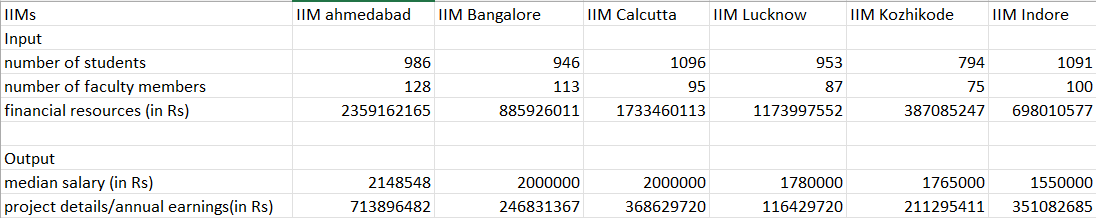

The goal is to identify efficient and inefficient organizations and their input-output weights. In order to solve this problem, it is necessary to solve the LP model for each organization.

---
## Python Implementation

We import the Gurobi Python Module and other Python libraries.

### Helper Functions

* `solve_DEA` builds and solves the LP model.

In [26]:
%pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import pandas as pd
from itertools import product

import gurobipy as gp
from gurobipy import GRB

# tested with Python 3.7.0 & Gurobi 9.1.0

In [29]:
def solve_DEA(target, verbose=True):
    # input-output values for the iims
    inattr = ['number of students', 'number of faculty members', 'Financial Resources (in Rs)']
    outattr = ['median salary(in Rs)', 'Project Details/annual earnings from executive development programs(in Rs)']
    
    dmus, inputs, outputs = gp.multidict({
        'IIM Ahmedabad': [{'number of students': 986, 'number of faculty members': 128, 'Financial Resources (in Rs)':2359162165 }, {'median salary(in Rs)': 2148548, 'Project Details/annual earnings from executive development programs(in Rs)': 713896482}],
        'IIM Bangalore': [{'number of students': 946, 'number of faculty members': 113, 'Financial Resources (in Rs)': 885926011}, {'median salary(in Rs)': 2000000, 'Project Details/annual earnings from executive development programs(in Rs)': 246831367}],
        'IIM Calcutta': [{'number of students': 1096, 'number of faculty members': 95, 'Financial Resources (in Rs)': 1733460113}, {'median salary(in Rs)':2000000 , 'Project Details/annual earnings from executive development programs(in Rs)': 368629720}],
        'IIM Lucknow': [{'number of students': 953, 'number of faculty members': 87, 'Financial Resources (in Rs)':1173997552}, {'median salary(in Rs)':1780000 , 'Project Details/annual earnings from executive development programs(in Rs)': 116429720}],
        'IIM Kozhikode': [{'number of students': 794, 'number of faculty members': 75, 'Financial Resources (in Rs)':387085247 }, {'median salary(in Rs)': 1765000, 'Project Details/annual earnings from executive development programs(in Rs)': 211295411}],
        'IIM Indore': [{'number of students': 1683, 'number of faculty members': 100, 'Financial Resources (in Rs)':698010577 }, {'median salary(in Rs)':1550000 , 'Project Details/annual earnings from executive development programs(in Rs)': 351082685}]
        
    })
    
    ### Create LP model
    model = gp.Model('DEA')
    
    # Decision variables
    wout = model.addVars(outattr, name="outputWeight")
    win =  model.addVars(inattr, name="inputWeight")

   

# Constraints
    ratios = model.addConstrs( ( gp.quicksum(outputs[h][r]*wout[r] for r in outattr ) 
                            - gp.quicksum(inputs[h][i]*win[i] for i in inattr ) 
                            <= 0 for h in dmus ), name='ratios' )

    normalization = model.addConstr((gp.quicksum(inputs[target][i]*win[i] for i in inattr ) == 1 ),
                                name='normalization')

# Objective function

    model.setObjective( gp.quicksum(outputs[target][r]*wout[r] for r in outattr ), GRB.MAXIMIZE)
    
    # Run optimization engine
    if not verbose:
        model.params.OutputFlag = 0
    model.optimize()
    
    # Print results
    print(f"\nThe efficiency of target DMU {target} is {round(model.objVal,3)}") 
    
    print("__________________________________________________________________")
    print(f"The weights for the inputs are:")
    for i in inattr:
        print(f"For {i}: {round(win[i].x,3)} ") 
        
    print("__________________________________________________________________")
    print(f"The weights for the outputs are")
    for r in outattr:
        print(f"For {r} is: {round(wout[r].x,3)} ") 
    print("__________________________________________________________________\n\n")  
    
    return model.objVal

## Input Data
We define the list of organizations(IIMs).

In [30]:
dmus = ['IIM Ahmedabad','IIM Bangalore','IIM Calcutta', 'IIM Lucknow', 'IIM Kozhikode','IIM Indore']

---
## Output Report

We print out the efficiency score of each garage and its associated input and output weights.

In [31]:
# Solving DEA model for each DMU

performance = {}
for h in dmus:    
    performance[h] = solve_DEA(h, verbose=False)



The efficiency of target DMU IIM Ahmedabad is 1.0
__________________________________________________________________
The weights for the inputs are:
For number of students: 0.001 
For number of faculty members: 0.0 
For Financial Resources (in Rs): 0.0 
__________________________________________________________________
The weights for the outputs are
For median salary(in Rs) is: 0.0 
For Project Details/annual earnings from executive development programs(in Rs) is: 0.0 
__________________________________________________________________



The efficiency of target DMU IIM Bangalore is 0.951
__________________________________________________________________
The weights for the inputs are:
For number of students: 0.001 
For number of faculty members: 0.0 
For Financial Resources (in Rs): 0.0 
__________________________________________________________________
The weights for the outputs are
For median salary(in Rs) is: 0.0 
For Project Details/annual earnings from executive development pr

---
## Analysis

We identify which organizations are efficient and which ones are inefficient, and provide the efficiency scores for each organizations
.

In [32]:
# Identifying efficient and inefficient DMUs

# Sorting garages in descending efficiency number
sorted_performance = {k: v for k, v in sorted(performance.items(), key=lambda item: item[1], reverse = True)}

efficient = []
inefficient = []

for h in sorted_performance.keys():
    if sorted_performance[h] >= 0.9999999:
        efficient.append(h) 
    if sorted_performance[h] < 0.9999999:
        inefficient.append(h) 
        
print('____________________________________________')
print(f"The efficient DMUs are:")
for eff in efficient:
    print(f"The performance value of DMU {eff} is: {round(performance[eff],3)}") 
    
print('____________________________________________')
print(f"The inefficient DMUs are:")
for ine in inefficient:
    print(f"The performance value of DMU {ine} is: {round(performance[ine],3)}") 


____________________________________________
The efficient DMUs are:
The performance value of DMU IIM Calcutta is: 1.377
The performance value of DMU IIM Indore is: 1.246
The performance value of DMU IIM Ahmedabad is: 1.0
The performance value of DMU IIM Kozhikode is: 1.0
____________________________________________
The inefficient DMUs are:
The performance value of DMU IIM Bangalore is: 0.951
The performance value of DMU IIM Lucknow is: 0.869
